In [2]:
import numpy as np
from utils import generator
from cv2 import imread, imwrite
import matplotlib.pylab as plt
from os.path import join
import os

In [52]:
code1 = np.random.randn(1,4096)
img_norm = generator.visualize_norm(code1)
img = generator.visualize(code1)

In [14]:
code_norm = (code1**2).sum()

In [37]:
code2 = np.random.randn(1,4096)
code2_ortho = code2 - code2@code1.T/code_norm * code1 #np.linalg.norm(code1)**2

In [35]:
code2_ortho@code1.T

array([[7.10542736e-15]])

In [38]:
img_norm = generator.visualize_norm(code2_ortho)
img = generator.visualize(code2_ortho)

In [42]:
step = 75
scaling_factor = step*np.arange(1,11)

In [45]:
scaling_factor

array([ 75, 150, 225, 300, 375, 450, 525, 600, 675, 750])

In [68]:
non_img = generator.visualize_norm(0*code1)
baseline_img = generator.visualize_norm(code1)
non_dist = []
baseline_dist = []
non_corr = []
baseline_corr = []
for sf in scaling_factor:
    img_cur = generator.visualize_norm(sf*code1)
    non_dist.append(image_distance(img_cur, non_img))
    baseline_dist.append(image_distance(img_cur, baseline_img))
    non_corr.append(image_distance(img_cur, non_img, metric="corr"))
    baseline_corr.append(image_distance(img_cur, baseline_img, metric="corr"))
print(non_corr)
print(baseline_corr)

[0.18342016897022284, 0.18230255666869044, 0.18191313899190947, 0.18172985136762315, 0.18158822696800184, 0.18152805379510992, 0.18148368231964, 0.18145695285883764, 0.1814146110278118, 0.18139599108822135]
[0.8696242489141636, 0.8677037660172133, 0.8670599862607724, 0.8667583951485134, 0.8665624911576577, 0.8664488721885756, 0.8663459773605418, 0.8662830333066647, 0.8662230859413179, 0.8661821455789753]


In [115]:
non_img = generator.visualize_norm(0*code1)
baseline_img = generator.visualize_norm(10*code1)
non_dist = []
baseline_dist = []
non_corr = []
baseline_corr = []
metric_space = ('caffe-net',"conv4")
step = 0.1
scaling_factor = step*np.arange(1,50)
for sf in scaling_factor:
    img_cur = generator.visualize(sf*code1)
    non_dist.append(image_distance(img_cur, non_img, space=metric_space))
    baseline_dist.append(image_distance(img_cur, baseline_img, space=metric_space))
    non_corr.append(image_distance(img_cur, non_img, space=metric_space, metric="corr"))
    baseline_corr.append(image_distance(img_cur, baseline_img, space=metric_space, metric="corr"))
print(non_corr)
print(baseline_corr)
print(non_dist)
print(baseline_dist)

C:\Users\ponce\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[0.8400530992097262, 0.7491055637454309, 0.6647949824762432, 0.586997611043811, 0.5304887637280963, 0.4891304176565007, 0.4632521711916213, 0.4410825096014383, 0.4200328346282911, 0.404460596464543, 0.3918174469661923, 0.3808901979153165, 0.37187696958895433, 0.3632179027436541, 0.3553953382556286, 0.34802490690077703, 0.3405350153337171, 0.33396297733799457, 0.3272663278550475, 0.3205228767878222, 0.3141043867523231, 0.3088810166974409, 0.3041667227993112, 0.29995748955403134, 0.2961592357077004, 0.29286747875701813, 0.28974968170305687, 0.28681985371867946, 0.28375084236399256, 0.2809120028337786, 0.2780887416115732, 0.27541568836128116, 0.272695011662356, 0.27027516354147463, 0.2679145271068759, 0.2655963003898872, 0.26344474521057576, 0.2614044807253617, 0.2592149244560105, 0.2574248098713794, 0.2554667424921547, 0.25341541410381646, 0.2515226918061044, 0.24977644488210923, 0.2479138312848316, 0.24605530600558154, 0.24445543824044688, 0.24292369581268822, 0.24156484048802357]
[0.36

In [110]:
print(non_dist)
print(baseline_dist)

[32980.65, 33096.78, 33135.273, 33145.6, 33153.043, 33157.477, 33160.29, 33162.195, 33164.152, 33165.605]
[0.0, 336.64542, 429.62308, 474.84106, 503.14532, 520.8955, 533.1521, 542.1522, 550.4455, 555.99115]


In [144]:
code1 = code1 / np.linalg.norm(code1)
step = 5
scaling_factor = step*np.arange(0,50)
img_list = []
for sf in scaling_factor:
    img_list.append( generator.visualize_norm(sf*code1) )
metric_space = "pixel"#('caffe-net',"conv2")
dist_mat = image_distance_matrix(img_list, space=metric_space, metric="dist")
corr_mat = image_distance_matrix(img_list, space=metric_space, metric="corr")

NameError: name 'img1' is not defined

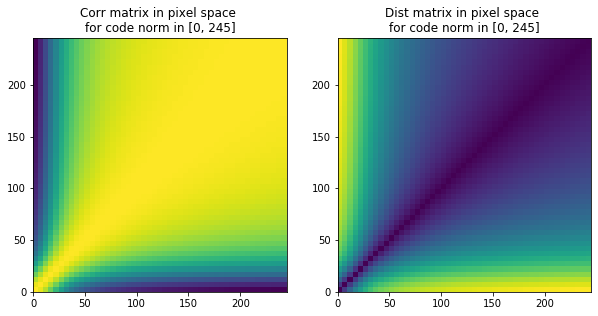

In [147]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.pcolor(scaling_factor,scaling_factor,corr_mat)
plt.axis("image")
plt.title("%s matrix in %s space \nfor code norm in [%.f, %.f]"%("Corr", metric_space, min(scaling_factor), max(scaling_factor)))
plt.subplot(1,2,2)
plt.pcolor(scaling_factor,scaling_factor,dist_mat)
plt.axis("image")
plt.title("%s matrix in %s space \nfor code norm in [%.f, %.f]"%("Dist", metric_space, min(scaling_factor), max(scaling_factor)))
plt.savefig(os.path.join(r"C:\Users\ponce\OneDrive\Desktop\OneDrive_Binxu\OneDrive\EvolvTrajStructure", "dist_mat_%s_%s.png"%(metric_space[0], metric_space[1])), facecolor='w', transparent=False)
plt.show()

In [122]:
image_distance_matrix([img_cur, non_img], space=('caffe-net',"conv2"), metric="dist")

C:\Users\ponce\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


array([[    0.   , 34326.914],
       [34326.914,     0.   ]], dtype=float32)

In [96]:
image_distance(img_cur, non_img, space=('caffe-net',"conv2"), metric="dist")

C:\Users\ponce\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


23810.445

## Deviation Distance Experiment 

In [167]:
num_code_dev = 50
code_dev_list = []
for i in range(num_code_dev):
    code2 = np.random.randn(1,4096)
    code2_ortho = code2 - code2@code1.T/np.linalg.norm(code1)**2 * code1
    code_dev_list.append(code2_ortho / np.linalg.norm(code2_ortho))

In [179]:
metric_space = "pixel"
metric_space2 = ('caffe-net',"conv4")
step = 5
dev_norm_list = [10, 50, 100, 500]
scaling_factor = step*np.arange(0,50)
dev_norm_list = [10, 50, 100, 500]

In [168]:
dist_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
corr_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
dist_conv4_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
corr_conv4_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
for i in range(num_code_dev):
    for j, norm2 in enumerate(dev_norm_list):
        for k, norm in enumerate(scaling_factor):
            code2 = code_dev_list[i]
            img_dev = generator.visualize_norm(norm*code1 + norm2*code2)
            img_cur = generator.visualize_norm(norm*code1)
            dist_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space)
            corr_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space, metric="corr")
            dist_conv4_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space2)
            corr_conv4_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space2, metric="corr")

C:\Users\ponce\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [180]:
np.savez("code_dev_dist.npz", code1=code1,code_dev_list=code_dev_list, scaling_factor=scaling_factor,
        dist_tsr=dist_tsr, corr_tsr=corr_tsr, dist_conv4_tsr=dist_conv4_tsr, corr_conv4_tsr=corr_conv4_tsr)

In [184]:
img_output_dir = r"C:\Users\ponce\OneDrive\Desktop\OneDrive_Binxu\OneDrive\EvolvTrajStructure"

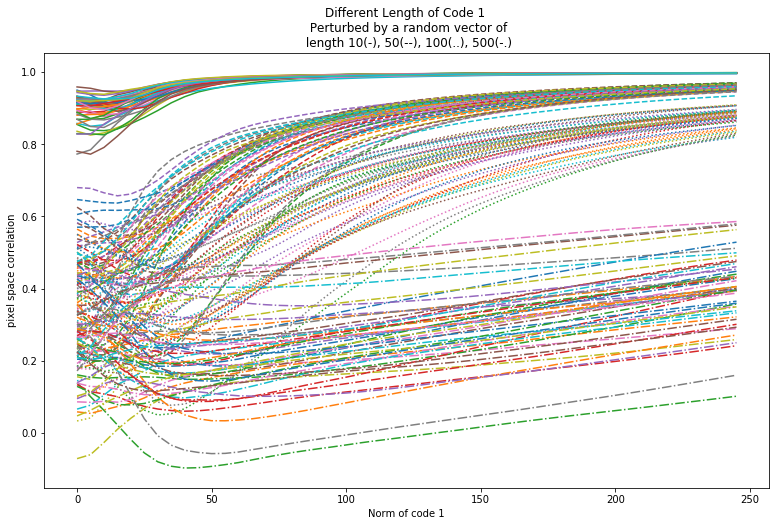

In [196]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, corr_tsr[:,0,:].T)
plt.plot(scaling_factor, corr_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, corr_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, corr_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space, "correlation"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_pixel_corr_summary.png"), facecolor='w', transparent=False)
plt.show()

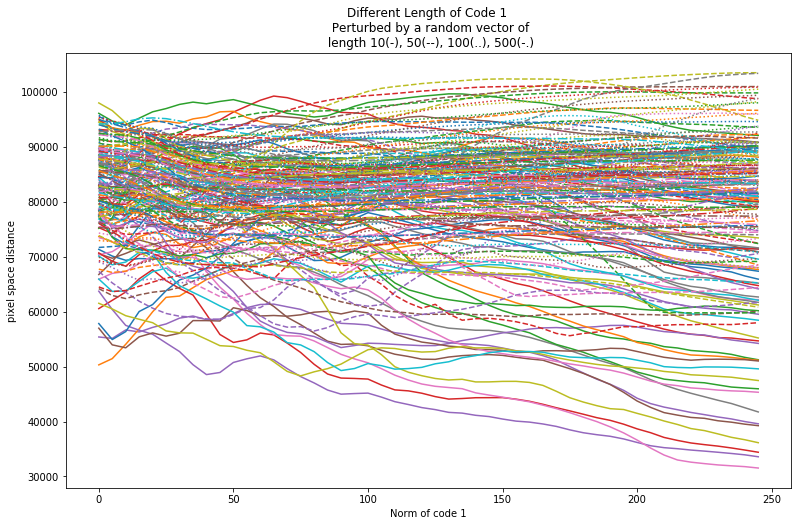

In [195]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, dist_tsr[:,0,:].T)
plt.plot(scaling_factor, dist_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, dist_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, dist_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space, "distance"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_pixel_dist_summary.png"), facecolor='w', transparent=False)
plt.show()

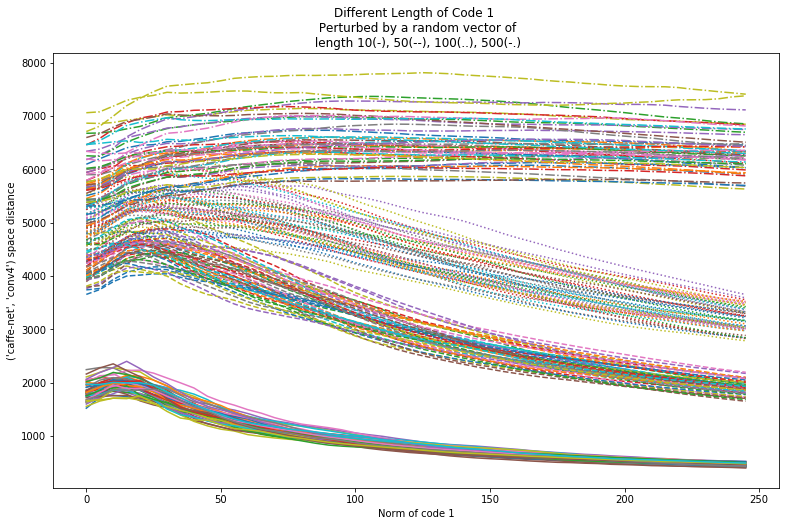

In [194]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, dist_conv4_tsr[:,0,:].T)
plt.plot(scaling_factor, dist_conv4_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, dist_conv4_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, dist_conv4_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space2, "distance"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_conv4_dist_summary.png"), facecolor='w', transparent=False)
plt.show()

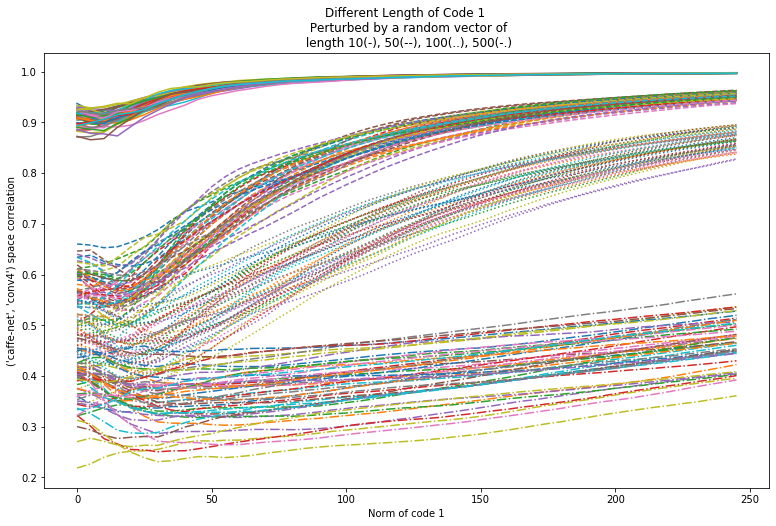

In [193]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, corr_conv4_tsr[:,0,:].T)
plt.plot(scaling_factor, corr_conv4_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, corr_conv4_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, corr_conv4_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space2, "correlation"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_conv4_corr_summary.png"), facecolor='w', transparent=False)
plt.show()

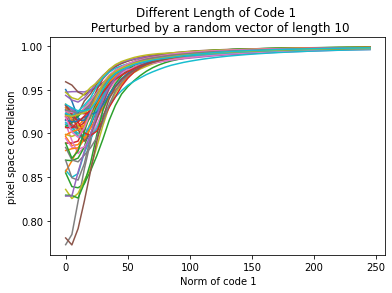

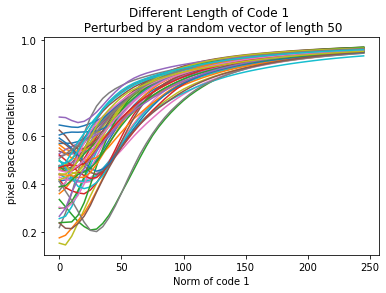

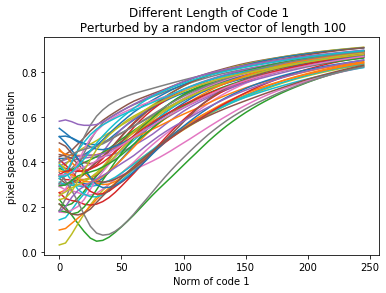

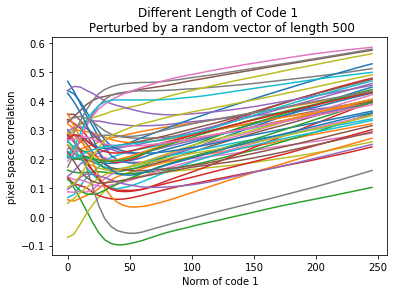

In [199]:
for j in range(len(dev_norm_list)):
    plt.plot(scaling_factor, corr_tsr[:,j,:].T)
    plt.title("Different Length of Code 1 \n Perturbed by a random vector of length %d"%dev_norm_list[j])
    plt.ylabel("%s space %s" % (metric_space, "correlation"))
    plt.xlabel("Norm of code 1")
    plt.savefig(os.path.join(img_output_dir, "perturb%d_pixel_corr.png"%(dev_norm_list[j])), facecolor='w', transparent=False)
    plt.show()

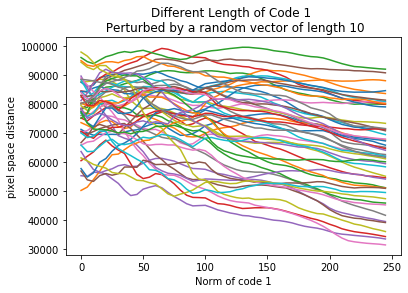

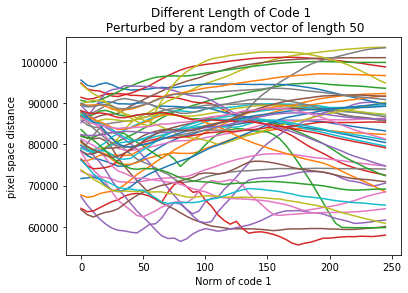

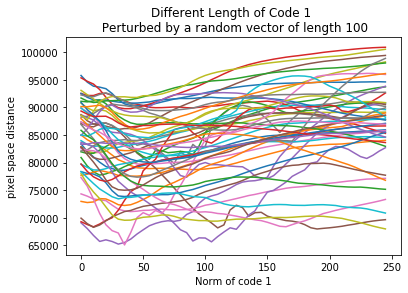

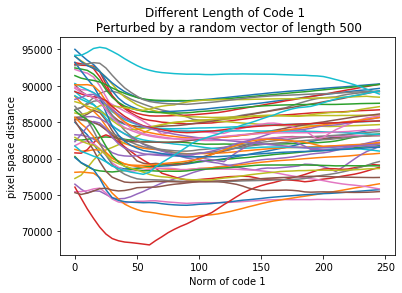

In [198]:
for j in range(len(dev_norm_list)):
    plt.plot(scaling_factor, dist_tsr[:,j,:].T)
    plt.title("Different Length of Code 1 \n Perturbed by a random vector of length %d"%dev_norm_list[j])
    plt.ylabel("%s space %s" % (metric_space, "distance"))
    plt.xlabel("Norm of code 1")
    plt.savefig(os.path.join(img_output_dir, "perturb%d_pixel_dist.png"%(dev_norm_list[j])), facecolor='w', transparent=False)
    plt.show()

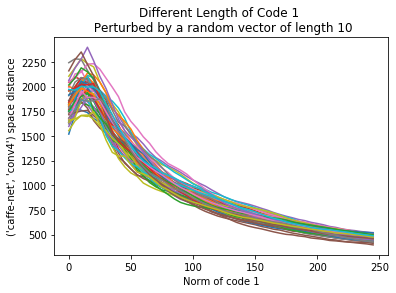

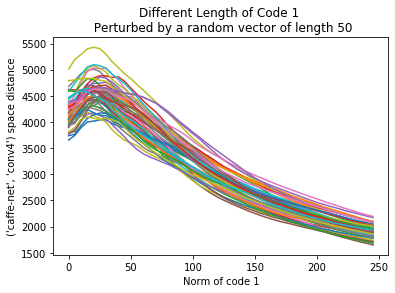

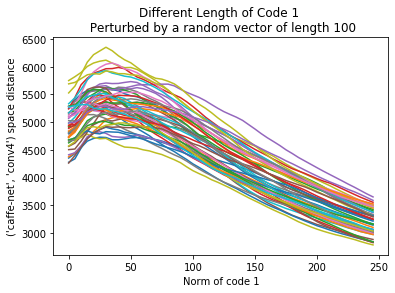

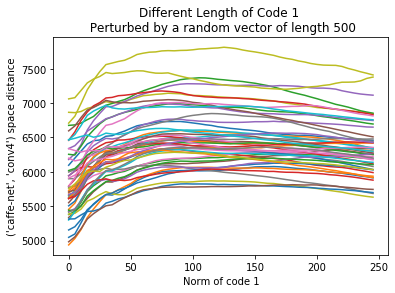

In [197]:
for j in range(len(dev_norm_list)):
    plt.plot(scaling_factor, dist_conv4_tsr[:,j,:].T)
    plt.title("Different Length of Code 1 \n Perturbed by a random vector of length %d"%dev_norm_list[j])
    plt.ylabel("%s space %s" % (metric_space2, "distance"))
    plt.xlabel("Norm of code 1")
    plt.savefig(os.path.join(img_output_dir, "perturb%d_conv4_dist.png"%(dev_norm_list[j])), facecolor='w', transparent=False)
    plt.show()

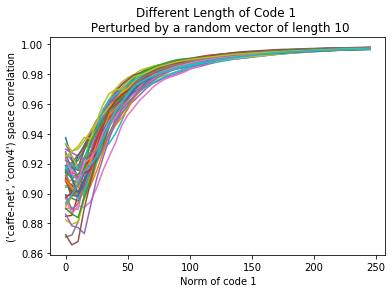

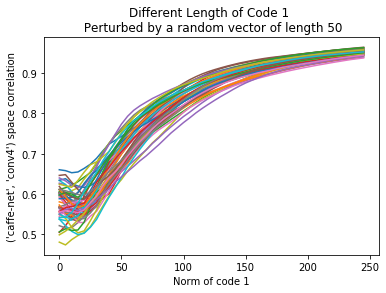

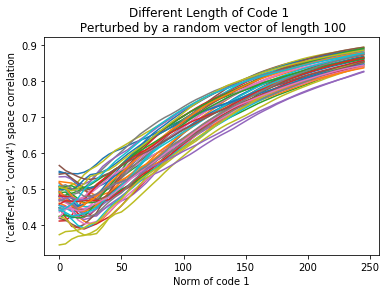

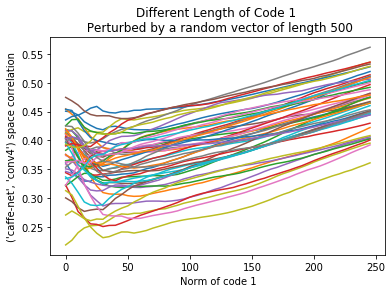

In [186]:
for j in range(len(dev_norm_list)):
    plt.plot(scaling_factor, corr_conv4_tsr[:,j,:].T)
    plt.title("Different Length of Code 1 \n Perturbed by a random vector of length %d"%dev_norm_list[j])
    plt.ylabel("%s space %s" % (metric_space2, "correlation"))
    plt.xlabel("Norm of code 1")
    plt.savefig(os.path.join(img_output_dir, "perturb%d_conv4_corr.png"%(dev_norm_list[j])), facecolor='w', transparent=False)
    plt.show()

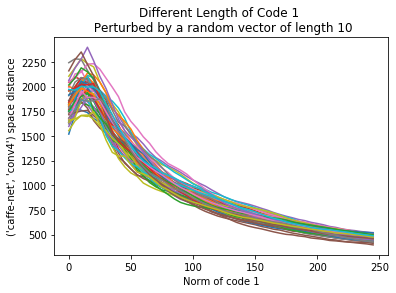

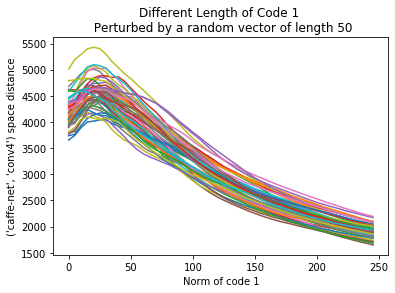

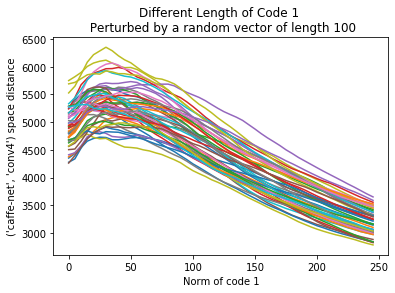

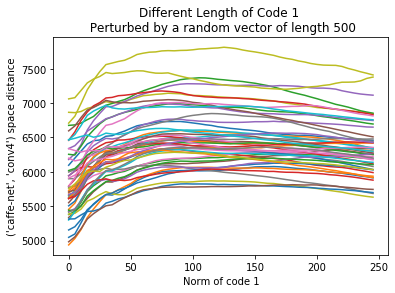

In [185]:
for j in range(len(dev_norm_list)):
    plt.plot(scaling_factor, dist_conv4_tsr[:,j,:].T)
    plt.title("Different Length of Code 1 \n Perturbed by a random vector of length %d"%dev_norm_list[j])
    plt.ylabel("%s space %s" % (metric_space2, "distance"))
    plt.xlabel("Norm of code 1")
    plt.savefig(os.path.join(img_output_dir, "perturb%d_conv4_dist.png"%(dev_norm_list[j])), facecolor='w', transparent=False)
    plt.show()

### Image distance in visualization with cropping

In [200]:
metric_space = "pixel"
metric_space2 = ('caffe-net',"conv4")
step = 5
dev_norm_list = [10, 50, 100, 500]
scaling_factor = step*np.arange(0,50)
dev_norm_list = [10, 50, 100, 500]

In [201]:
dist_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
corr_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
dist_conv4_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
corr_conv4_tsr = np.zeros((num_code_dev, len(dev_norm_list), len(scaling_factor)))
for i in range(num_code_dev):
    for j, norm2 in enumerate(dev_norm_list):
        for k, norm in enumerate(scaling_factor):
            code2 = code_dev_list[i]
            img_dev = generator.visualize(norm*code1 + norm2*code2)
            img_cur = generator.visualize(norm*code1)
            dist_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space)
            corr_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space, metric="corr")
            dist_conv4_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space2)
            corr_conv4_tsr[i,j,k] = image_distance(img_cur, img_dev, space=metric_space2, metric="corr")

C:\Users\ponce\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [202]:
np.savez("code_dev_dist_withcrop.npz", code1=code1,code_dev_list=code_dev_list, scaling_factor=scaling_factor,
        dist_tsr=dist_tsr, corr_tsr=corr_tsr, dist_conv4_tsr=dist_conv4_tsr, corr_conv4_tsr=corr_conv4_tsr)

In [184]:
img_output_dir = r"C:\Users\ponce\OneDrive\Desktop\OneDrive_Binxu\OneDrive\EvolvTrajStructure"

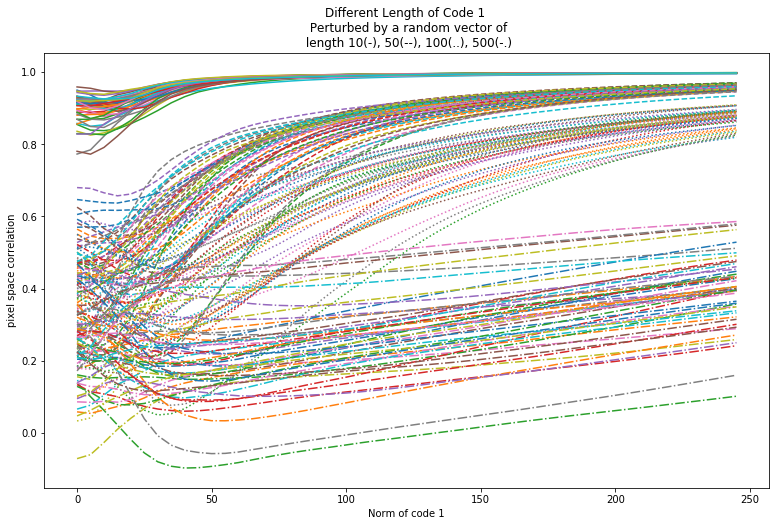

In [196]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, corr_tsr[:,0,:].T)
plt.plot(scaling_factor, corr_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, corr_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, corr_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 (visualize with crop)\n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space, "correlation"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_with_crop_pixel_corr_summary.png"), facecolor='w', transparent=False)
plt.show()

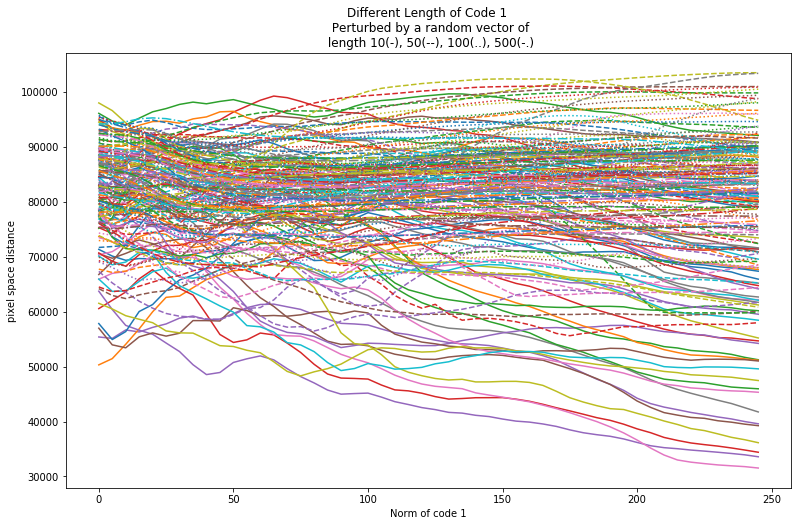

In [195]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, dist_tsr[:,0,:].T)
plt.plot(scaling_factor, dist_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, dist_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, dist_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space, "distance"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_pixel_dist_summary.png"), facecolor='w', transparent=False)
plt.show()

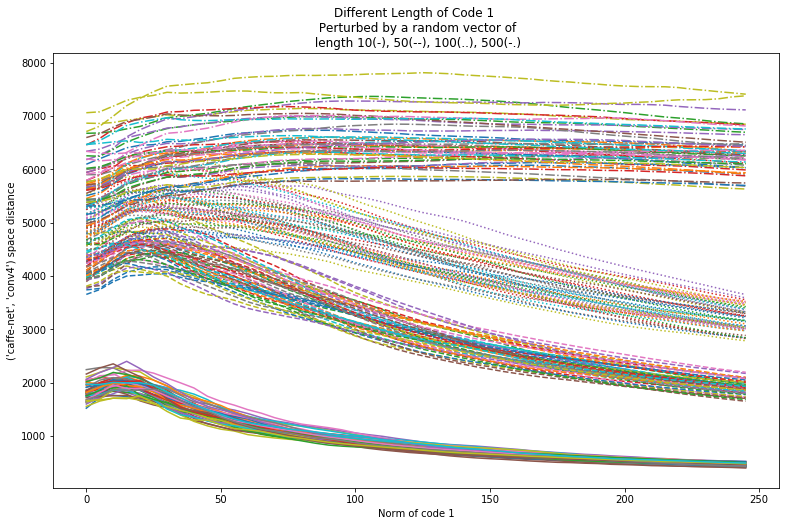

In [194]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, dist_conv4_tsr[:,0,:].T)
plt.plot(scaling_factor, dist_conv4_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, dist_conv4_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, dist_conv4_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space2, "distance"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_conv4_dist_summary.png"), facecolor='w', transparent=False)
plt.show()

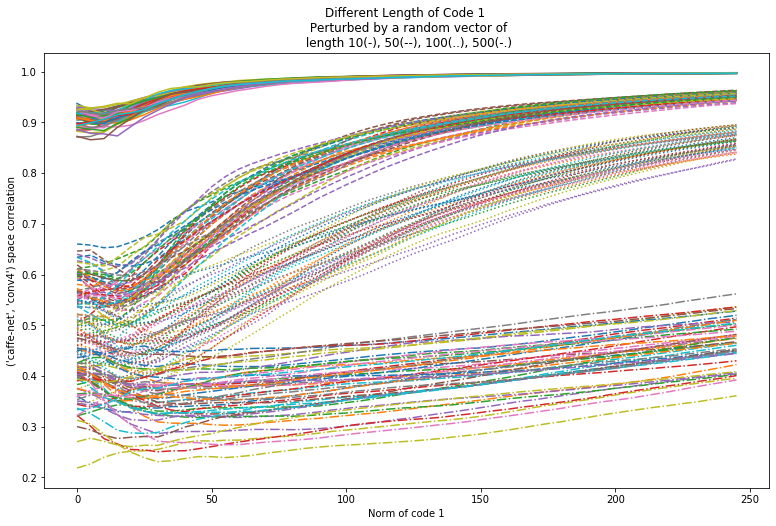

In [193]:
plt.figure(figsize=[13,8])
plt.plot(scaling_factor, corr_conv4_tsr[:,0,:].T)
plt.plot(scaling_factor, corr_conv4_tsr[:,1,:].T, linestyle='dashed')
plt.plot(scaling_factor, corr_conv4_tsr[:,2,:].T, linestyle=':')
plt.plot(scaling_factor, corr_conv4_tsr[:,3,:].T, linestyle='-.')
plt.title("Different Length of Code 1 \n Perturbed by a random vector of\n length %d(-), %d(--), %d(..), %d(-.)"
          %tuple(dev_norm_list))
plt.ylabel("%s space %s" % (metric_space2, "correlation"))
plt.xlabel("Norm of code 1")
plt.savefig(os.path.join(img_output_dir, "perturb_conv4_corr_summary.png"), facecolor='w', transparent=False)
plt.show()

### Drafts

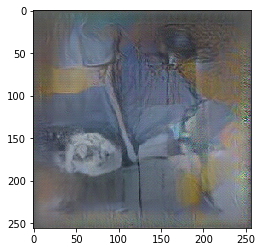

In [51]:
plt.imshow(img_cur)
plt.show()

In [92]:
tfmr = net_utils.get_transformer(caffenet, scale=1)
tim = tfmr.preprocess('data', img_cur)  # shape=(3, 227, 227)
#caffenet.blobs['data'].data[...] = tim
ftmap = caffenet.forward(end="conv2")

C:\Users\ponce\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [ ]:
step = 75
for i in range(15):
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] - step * pca1.components_[1, :])

In [ ]:
step = 75
plt.figure(figsize=[20,3])
for i in range(15):
    plt.subplot(3,15,i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] - step * pca1.components_[1, :])
    plt.imshow(img)
    plt.title("%d" % (step *(i-7)))
    plt.axis("off")
    plt.subplot(3,15,15+i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] +0* step * pca1.components_[1, :])
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(3,15,30+i+1)
    img = generator.visualize_norm( step *(i-7) *pca1.components_[0, :] + step * pca1.components_[1, :])
    plt.imshow(img)
    plt.axis("off")
plt.show()

## Utility function

In [116]:
import scipy

In [121]:
def image_distance_matrix(img_list, space="pixel", metric="dist"):
    feat_arr = []
    if space=="pixel":
        vec1 = img1.flatten()
        vec2 = img2.flatten()
    elif type(space) is tuple and len(space)==2:
        net_name = space[0]
        layer_name = space[1]
        caffenet = net_utils.load(net_name)
        tfmr = net_utils.get_transformer(caffenet, scale=1)
        for img in img_list:
            caffenet.blobs['data'].data[...] = tfmr.preprocess('data', img) # shape=(3, 227, 227)
            feat_arr.append(caffenet.forward(end=layer_name)[layer_name].flatten())
    feat_arr = np.array(feat_arr)
    if metric == "dist":
        dist = scipy.spatial.distance_matrix(feat_arr,feat_arr)
    elif metric == "corr":
        dist = np.corrcoef(feat_arr)
    return dist

In [93]:
def image_distance(img1, img2, space="pixel", metric="dist"):
    if space=="pixel":
        vec1 = img1.flatten()
        vec2 = img2.flatten()
    elif type(space) is tuple and len(space)==2:
        net_name = space[0]
        layer_name = space[1]
        caffenet = net_utils.load(net_name)
        tfmr = net_utils.get_transformer(caffenet, scale=1)
        caffenet.blobs['data'].data[...] = tfmr.preprocess('data', img1) # shape=(3, 227, 227)
        vec1 = caffenet.forward(end=layer_name)[layer_name].flatten()
        caffenet.blobs['data'].data[...] = tfmr.preprocess('data', img2) # shape=(3, 227, 227)
        vec2 = caffenet.forward(end=layer_name)[layer_name].flatten()
    if metric == "dist":
        dist = np.linalg.norm(vec1-vec2)
    elif metric == "corr":
        dist = np.corrcoef(vec1, vec2)[0,1]
    return dist

In [72]:
import net_utils
caffenet = net_utils.load('caffe-net')